This Notebook will 'simply' learn to calculate a given number representing the degrees in Fahrenheit to its Celsius equivalent. 

In [2]:
#First we import numpy, tensorflow and finally matplotlib to visualise our training's loss
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Let the data's inputs consist of random numbers between -50 and 101
f_inputs = np.random.uniform(low=-50, high=101, size=(75,))
c_outputs = []

#We calculate the Fahrenheit equivalent for the expected output
for i in f_inputs:
  temp = (i - 32) * 5.0/9.0
  c_outputs.append(temp)

print(f_inputs)
print(c_outputs)

[-49.19545001   9.53190149  70.10106218  11.61256175 -12.38851015
  97.62806525  80.17309864 -21.27446942   0.6361054  -14.05386979
  98.26459289  19.13066183  96.83822828  71.32651928  21.24198933
  69.22045278 -41.80260563  84.93994111 -27.35765141  83.69140438
 -27.76589601  35.87793986  83.25326905  86.18856681  21.65339915
 -14.51442426  35.51162888  25.27157307   7.08353038  81.29201821
  12.07485239 100.6484653  -20.63546449   2.81159088  69.5822842
  64.54650859  -5.75881706  60.45272792  82.10178106 -49.95896988
 -21.81063002  24.92842303  81.58913701   7.23605589 -33.41536195
  79.1886234   31.92065659  41.98558637  57.0969214  -46.94569001
  64.19520256  84.06407666  68.56202989 -10.13296206  28.39652515
 -35.28228662  52.33283664  87.92394205  52.44583001  77.45267778
  31.27624729  20.39351463  10.44771058 -36.09082708 -32.53555753
 -32.35141238  -9.57977143  37.77618445  87.61361877 -16.73263565
 -49.39765116  40.85824741  52.72636196  -5.62493916 -34.77155663]
[-45.10858

I am pretty happy with how those numbers look. For example, I get -4.52846963 (F) as -20.293594237137746 (C), which is correct.

In [3]:
#We convert our datasets now to np.arrays for optimum usage. They are much more memory efficient, they don't call other Python objects
#The added bonus is that we get access to matrix and vector functions built-in
f_inputs_np = np.array(f_inputs, dtype=float)
c_outputs_np = np.array(c_outputs, dtype=float)

#We're using a simple 1 layered Sequential model because we have a simple 1 input and 1 output dataset
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential(layer)

#The loss function is important as it will indicate how well our model above is performing. We want a low Mean Squared Error.
#Adam is a way for the model to optimize itself during training where it looks to see how close its guess is to what is expected.
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
#Fit does the actual training and does it for the number of epochs (sounds epic, just means iterations)
history = model.fit(f_inputs_np, c_outputs_np, epochs=500, verbose=False)
print("Finished training")

Finished training


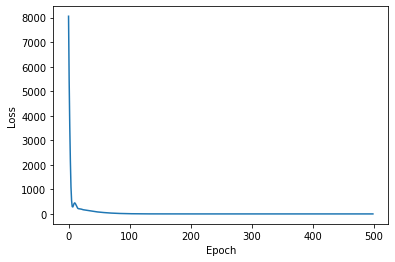

In [4]:
#Let's have a look at how we did on our training
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

Pretty good we're getting very close to 0 in our loss.

In [5]:
#Let's do a prediction on our model. One of my favourites is -40 because it's the same in Celsius and Fahrenheit
print(model.predict([-40.0]))

[[-39.99995]]


In [6]:
#I had a look at 32 Fahrenheit because that is 0
print(model.predict([32.0]))

[[2.670288e-05]]


In [7]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.5555552]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-17.77774], dtype=float32)>]


In [8]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '../Models/FtoC')